In [63]:
import pandas as pd

disasters = pd.read_csv('1970-2021_DISASTERS.xlsx - emdat data.csv')
merged_data = pd.read_csv('merged_data_clean.csv')


## Data gathering & cleaning

### DISASTERS DATASET 

In [64]:
disasters.isna().sum()

Dis No                                 0
Year                                   0
Seq                                    0
Glide                              13063
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2747
Disaster Subsubtype                13600
Event Name                         10999
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1346
Origin                             10864
Associated Dis                     11412
Associated Dis2                    13946
OFDA Response                      13194
Appeal                             12204
Declaration                        11517
Aid Contribution                   13967
Dis Mag Value                      10075
Dis Mag Scale                       1073
Latitude        

In [65]:
disasters.dropna(how= 'all', inplace= True)

In [66]:
disasters.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [67]:
disasters.columns = disasters.columns.str.lower().str.replace(" ", "_")

columns_to_keep = ['year', 'disaster_subgroup', 'disaster_type', 'country', 'total_deaths', 'total_affected']

disasters = disasters[columns_to_keep]

disasters.drop_duplicates(keep='first', inplace=True)
disasters['total_affected'].fillna(0, inplace=True)  

disasters.head()



,year,disaster_subgroup,disaster_type,country,total_deaths,total_affected
0,1970,Hydrological,Flood,Argentina,36.0,0.0
1,1970,Meteorological,Storm,Australia,13.0,0.0
2,1970,Hydrological,Flood,Benin,NaN,0.0
3,1970,Meteorological,Storm,Bangladesh,300000.0,3648000.0
4,1970,Meteorological,Storm,Bangladesh,17.0,110.0


In [68]:
disasters.shape

(14348, 6)

#### Disasters EDA

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


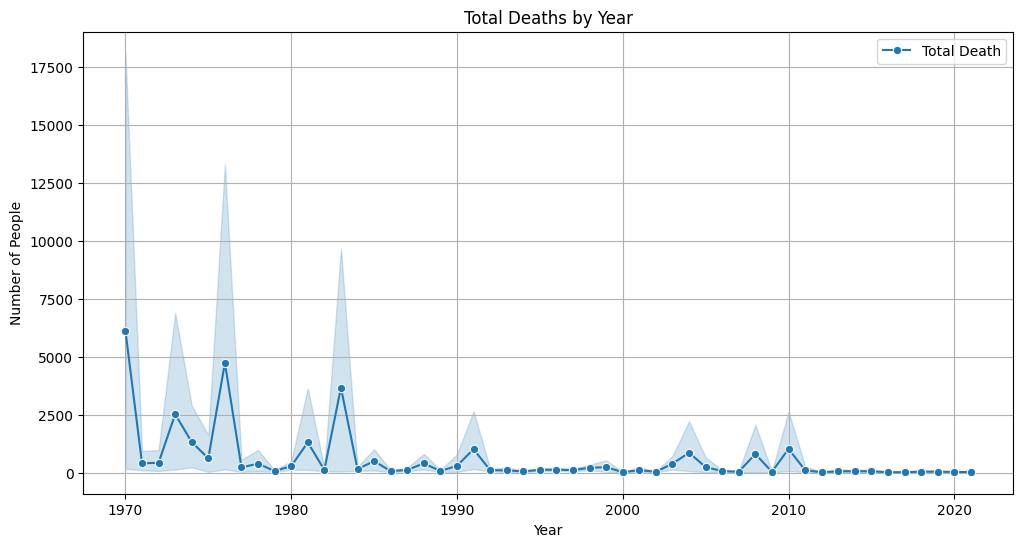

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_deaths', data=disasters, marker='o', label='Total Death')
plt.title('Total Deaths by Year')
plt.ylabel('Number of People')
plt.xlabel('Year')
plt.grid(True)
plt.show()


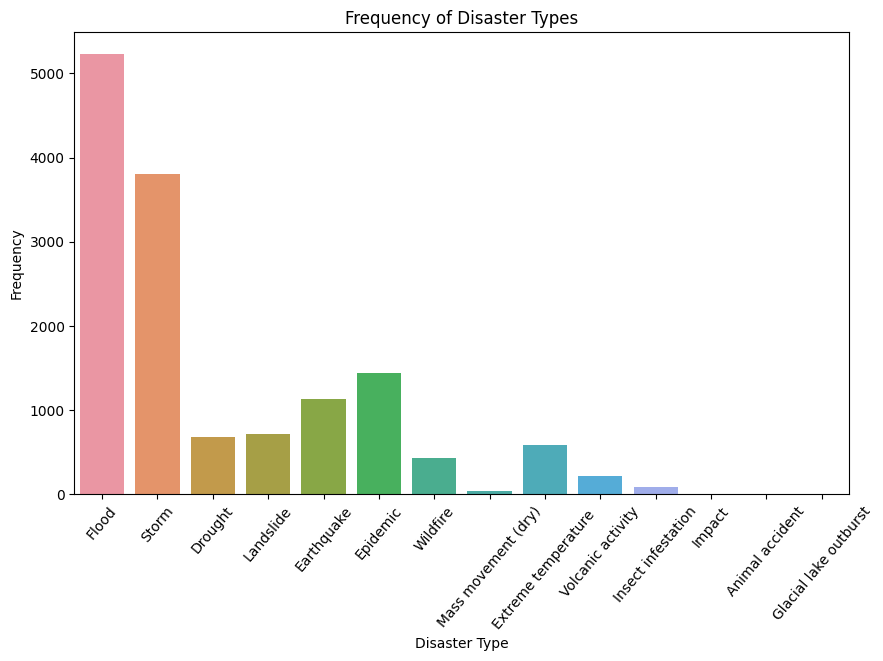

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='disaster_type', data=disasters)
plt.title('Frequency of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=50)
plt.show()


In [71]:
death_by_disaster = disasters.groupby('disaster_type')['total_deaths'].sum()

display(death_by_disaster)

disaster_type
Animal accident               12.0
Drought                   700774.0
Earthquake               1319283.0
Epidemic                  259591.0
Extreme temperature       189101.0
Flood                     330482.0
Glacial lake outburst        250.0
Impact                         0.0
Insect infestation             0.0
Landslide                  40714.0
Mass movement (dry)         2324.0
Storm                     816803.0
Volcanic activity          27135.0
Wildfire                    2963.0
Name: total_deaths, dtype: float64

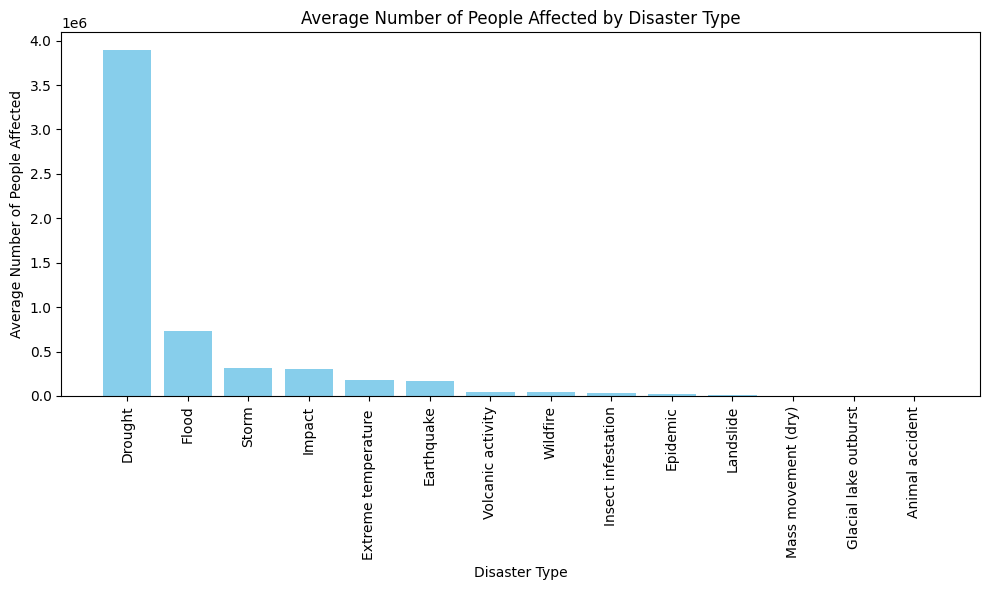

In [72]:
# Calculate the average number of people affected by disaster type
average_affected_by_type = disasters.groupby('disaster_type')['total_affected'].mean().reset_index()

# Sort the results for better visualization
average_affected_by_type_sorted = average_affected_by_type.sort_values('total_affected', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(average_affected_by_type_sorted['disaster_type'], average_affected_by_type_sorted['total_affected'], color='skyblue')
plt.title('Average Number of People Affected by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Average Number of People Affected')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### WORLD DATA

In [73]:
world_data = pd.read_csv('world-data-2023.csv')

world_data.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [74]:
desired_columns = ['Country', 'Capital/Major City', 'Co2-Emissions', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Population']

world_data = world_data[desired_columns]
world_data.columns = world_data.columns.str.lower().str.replace(" ", "_").str.replace("%", "").str.replace("(", "").str.replace(")", "")
disasters.rename(columns={'gross_primary_education_enrollment_': 'gross_primary_education_enrollment', 'gross_tertiary_education_enrollment_':'gross_tertiary_education_enrollment'}, inplace=True)

world_data.head()

,country,capital/major_city,co2-emissions,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,infant_mortality,life_expectancy,population
0,Afghanistan,Kabul,"8,672","$19,101,353,833",104.00%,9.70%,47.9,64.5,"38,041,754"
1,Albania,Tirana,"4,536","$15,278,077,447",107.00%,55.00%,7.8,78.5,"2,854,191"
2,Algeria,Algiers,"150,006","$169,988,236,398",109.90%,51.40%,20.1,76.7,"43,053,054"
3,Andorra,Andorra la Vella,469,"$3,154,057,987",106.40%,NaN,2.7,NaN,"77,142"
4,Angola,Luanda,"34,693","$94,635,415,870",113.50%,9.30%,51.6,60.8,"31,825,295"


#### World data EDA

### Mental health - Depression


In [75]:
import pandas as pd


depression = pd.read_excel('Mental Health Depression disorder Data.xlsx')

depression.drop(columns={'Drug use disorders (%)', "Alcohol use disorders (%)"})
depression.columns = depression.columns.str.lower().str.replace(" ", "").str.replace("%", "").str.replace("(", "").str.replace(")", "")

depression.head()

,entity,code,year,schizophrenia,bipolardisorder,eatingdisorders,anxietydisorders,drugusedisorders,depression,alcoholusedisorders
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [76]:
depression.shape

(6468, 10)

In [77]:
# Calculate the correlation matrix between mental health disorders and climate change indicators
correlation_matrix = merged_data[[
    'schizophrenia', 'bipolardisorder', 'eatingdisorders', 'anxietydisorders',
    'drugusedisorders', 'depression', 'alcoholusedisorders',
    'average_emissions', 'disaster_count'
]].corr()

# Extract the correlation values between mental health issues and climate change indicators
correlation_with_climate = correlation_matrix.loc[
    ['schizophrenia', 'bipolardisorder', 'eatingdisorders', 'anxietydisorders',
     'drugusedisorders', 'depression', 'alcoholusedisorders'],
    ['average_emissions', 'disaster_count']
]

correlation_with_climate


,average_emissions,disaster_count
schizophrenia,0.376781,0.123226
bipolardisorder,-0.149831,-0.116007
eatingdisorders,0.092814,-0.060041
anxietydisorders,0.091478,-0.040007
drugusedisorders,0.275678,-0.031640
depression,0.099962,-0.016963
alcoholusedisorders,0.048489,-0.081934


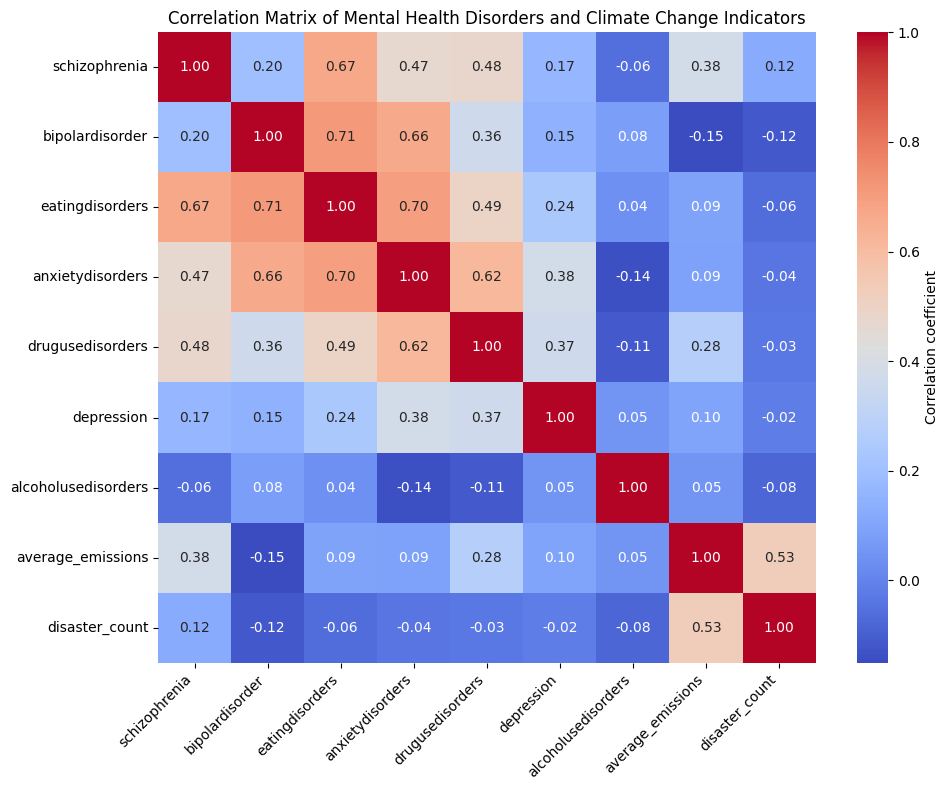

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading step, replace 'your_data.csv' with your actual data file
# df = pd.read_csv('your_data.csv')

# Example DataFrame columns: ['schizophrenia', 'bipolardisorder', 'eatingdisorders', 'anxietydisorders', 
# 'drugusedisorders', 'depression', 'alcoholusedisorders', 'average_emissions', 'disaster_count']

# Calculate the correlation matrix
correlation_matrix = merged_data[[
    'schizophrenia', 'bipolardisorder', 'eatingdisorders', 'anxietydisorders',
    'drugusedisorders', 'depression', 'alcoholusedisorders',
    'average_emissions', 'disaster_count'
]].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Mental Health Disorders and Climate Change Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


#### Mental health EDA


c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


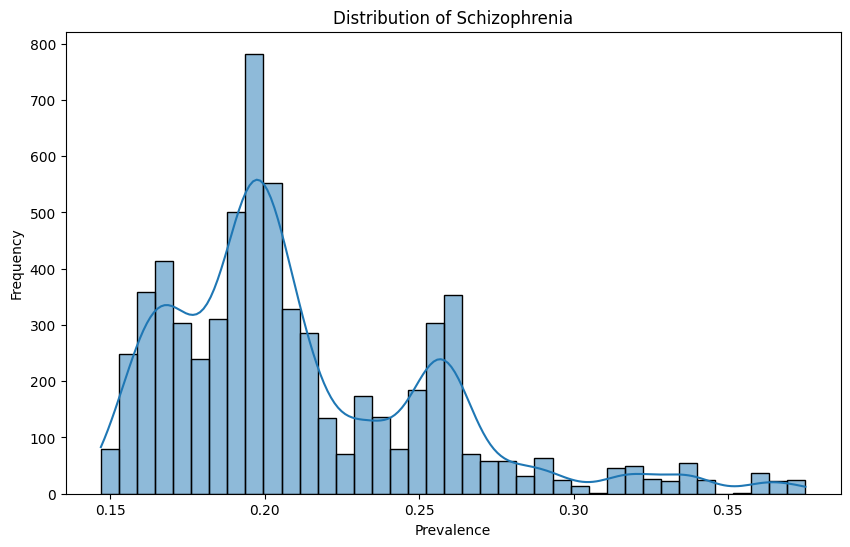

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


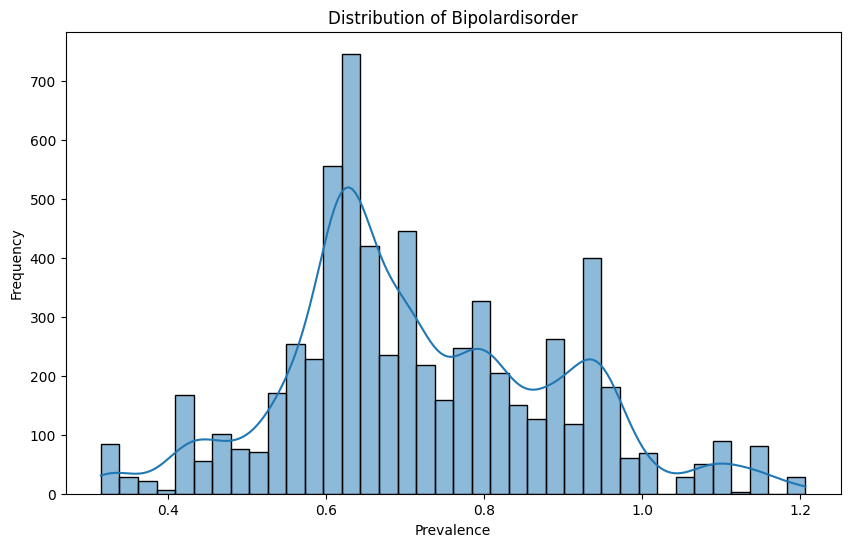

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


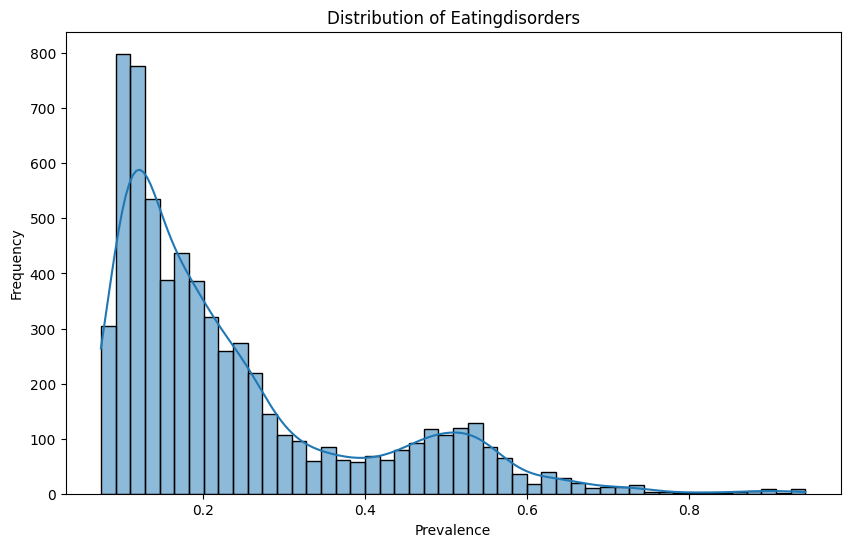

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


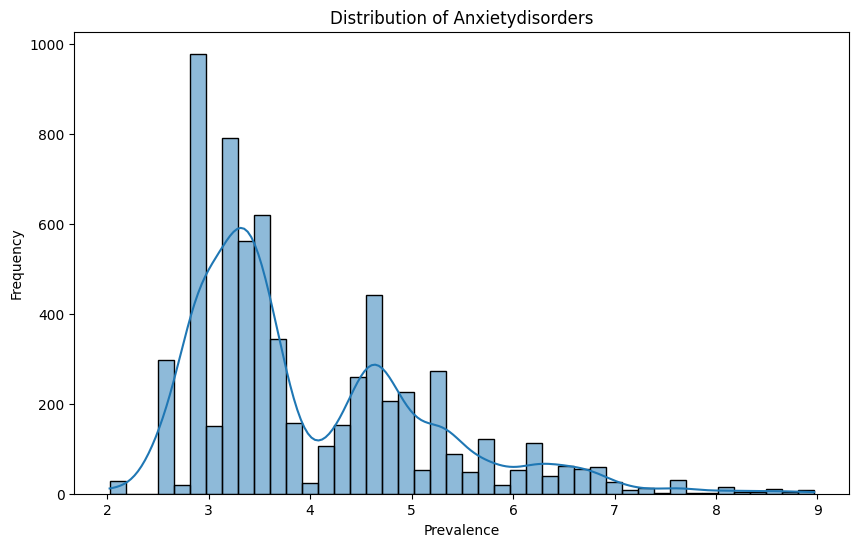

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


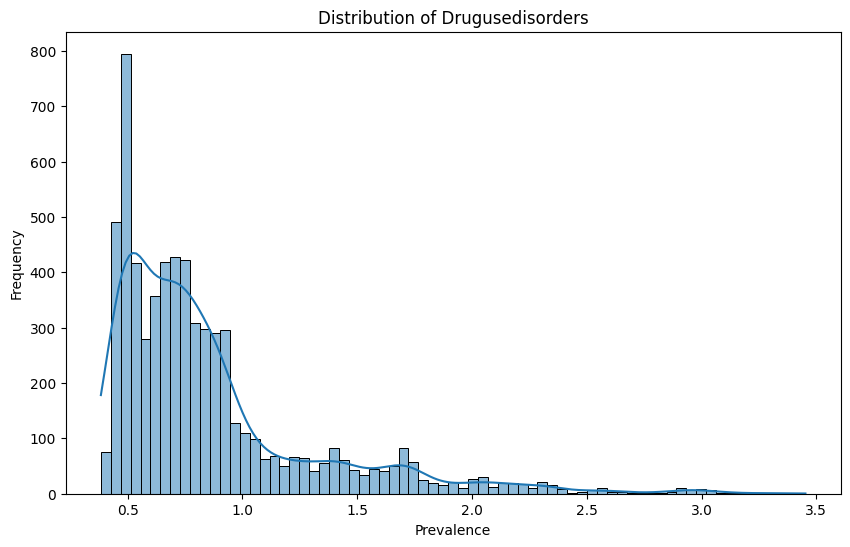

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


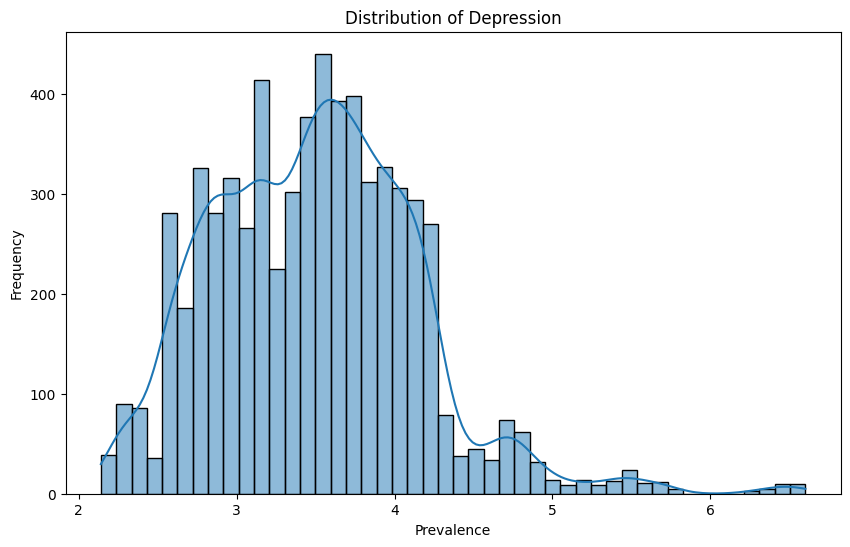

c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


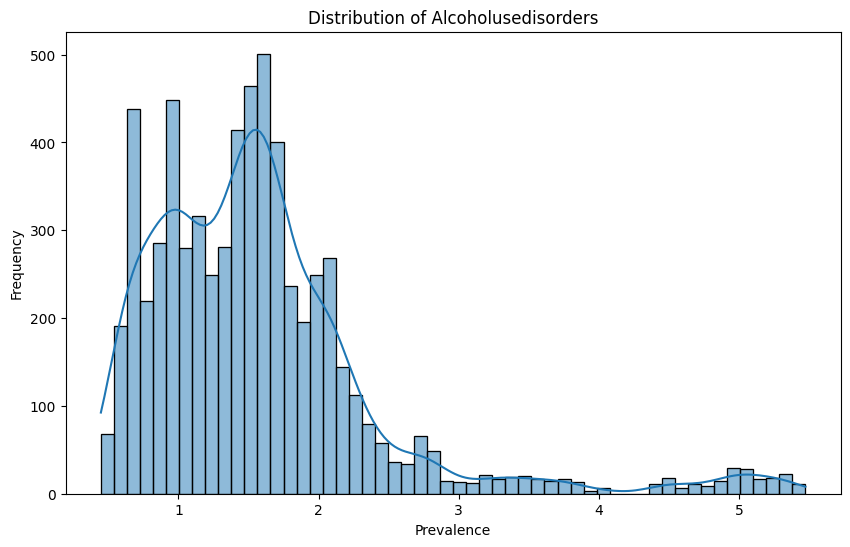

In [79]:
disorders = ['schizophrenia', 'bipolardisorder', 'eatingdisorders', 'anxietydisorders', 'drugusedisorders', 'depression', 'alcoholusedisorders']

for disorder in disorders:
    plt.figure(figsize=(10, 6))
    sns.histplot(depression[disorder], kde=True)
    plt.title(f'Distribution of {disorder.capitalize()}')
    plt.xlabel('Prevalence')
    plt.ylabel('Frequency')
    plt.show()

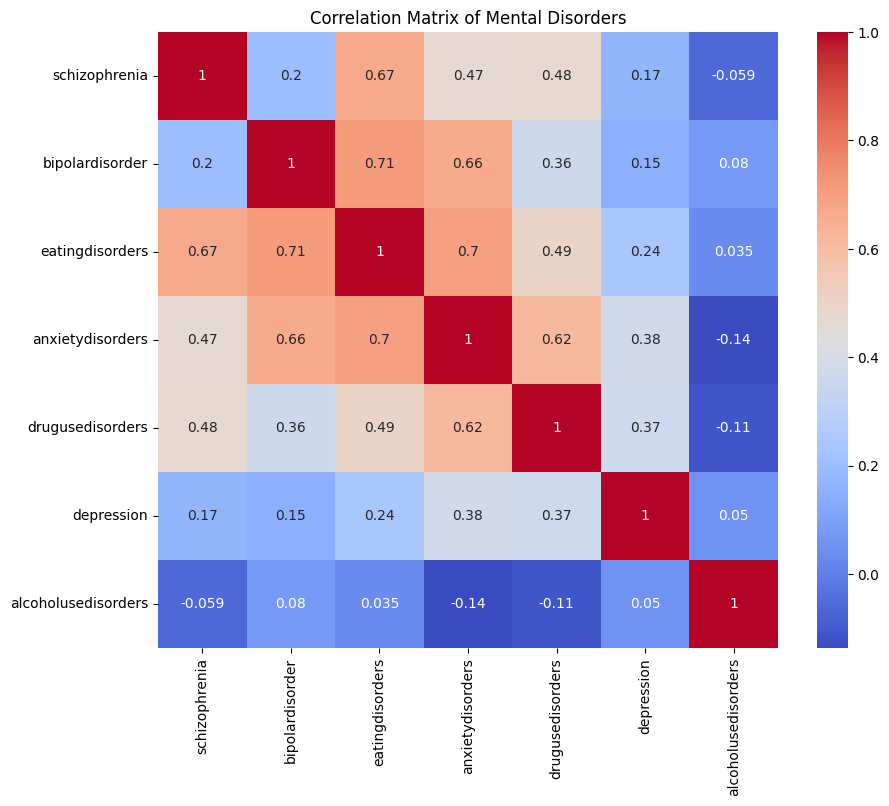

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(depression[disorders].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Mental Disorders')
plt.show()

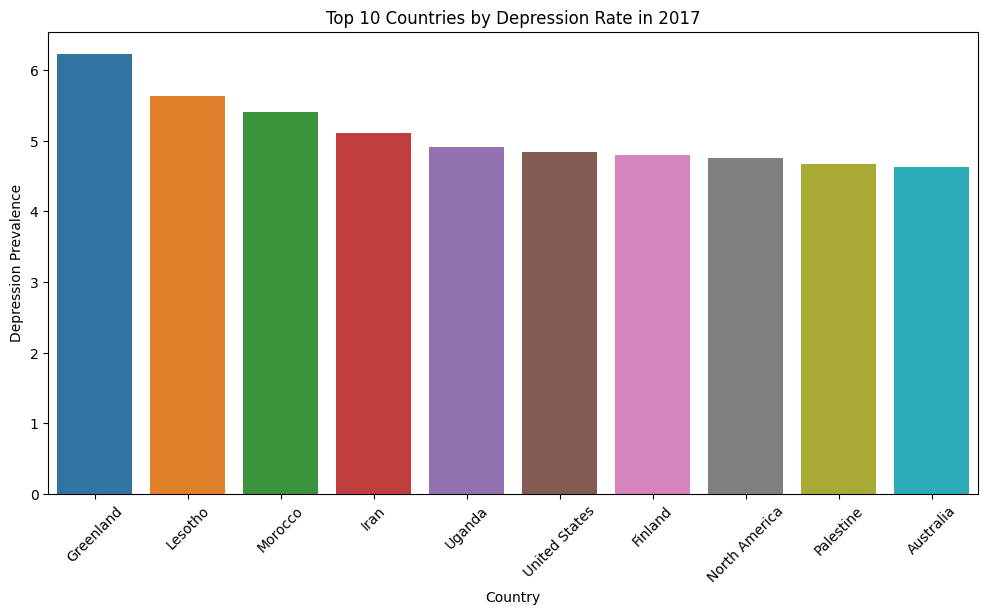

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'depression'
# Example: Top 10 countries with highest depression rates in the latest year available
latest_year = depression['year'].max()  # Use the DataFrame to get the maximum year
top_countries = depression[depression['year'] == latest_year].sort_values(by='depression', ascending=False).head(10)  # Sort and get top 10

plt.figure(figsize=(12, 6))
sns.barplot(x='entity', y='depression', data=top_countries)
plt.title('Top 10 Countries by Depression Rate in ' + str(latest_year))
plt.xlabel('Country')
plt.ylabel('Depression Prevalence')
plt.xticks(rotation=45)
plt.show()


### Climate Anxiety

In [82]:
anxiety = pd.read_spss('Climate Anxiety-3.SAV')

anxiety.columns

Index(['Respondent_Serial', 'language', 'country', 'D1', 'D2', 'D3', 'Q1',
       'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2',
       'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2',
       'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'yyyymmdd',
       'AgeGender', 'regionAustralia', 'regionUS', 'regionUK', 'regionIndia',
       'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal',
       'regionBrazil', 'regionFrance', 'weight'],
      dtype='object')

In [83]:
columns_to_keep = ['country', 'D1', 'D2', 'D3', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9']

anxiety = anxiety[columns_to_keep]

anxiety.columns


Index(['country', 'D1', 'D2', 'D3', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4',
       'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q2_11', 'Q2_12',
       'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6',
       'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6',
       'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6',
       'Q8_7', 'Q8_8', 'Q8_9'],
      dtype='object')

In [84]:
import pandas as pd


# Mapping dictionaries
mapping_q1 = {
    'not worried': 0,
    'a little': 1,
    'moderately': 2,
    'very': 3,
    'extremely': 4,
    'Prefer not to say': None
}

mapping_q6_q8 = {
    'not at all': 0,
    'a little': 1,
    'moderately': 2,
    'very': 3,
    'extremely': 4,
    'Prefer not to say': None
}

mapping_yes_no = {
    'yes': 1,
    'no': 0,
    'Prefer not to say': None
}

# Apply mappings to Q1, Q6, and all Q8 sub-questions
anxiety['Q1'] = anxiety['Q1'].astype(str).map(mapping_q1)
anxiety['Q6'] = anxiety['Q6'].astype(str).map(mapping_q6_q8)

# For Q8 sub-questions
for i in range(1, 10):
    col_name = f'Q8_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_q6_q8)

# For Q2 sub-questions (yes/no)
for i in range(1, 15):
    col_name = f'Q2_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_yes_no)

# Q3, Q5 and all Q4 and Q7 sub-questions are yes/no type
anxiety['Q3'] = anxiety['Q3'].astype(str).map(mapping_yes_no)
anxiety['Q5'] = anxiety['Q5'].astype(str).map(mapping_yes_no)

for i in range(1, 8):
    col_name = f'Q4_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_yes_no)

for i in range(1, 10):
    col_name = f'Q7_{i}'
    anxiety[col_name] = anxiety[col_name].astype(str).map(mapping_yes_no)

# anxiety.to_csv('path_to_your_modified_survey_data.csv', index=False)

print("Data types and unique values check:")
for col in anxiety.columns:
    print(f"{col}: {anxiety[col].dtype}, unique values: {anxiety[col].unique()}")

anxiety.head()

Data types and unique values check:
country: category, unique values: ['France', 'Philippines', 'Australia', 'India', 'Finland', 'Portugal', 'United Kingdom', 'Brazil', 'Nigeria', 'United States']
Categories (10, object): ['Australia', 'Brazil', 'Finland', 'France', ..., 'Philippines', 'Portugal', 'United Kingdom', 'United States']
D1: float64, unique values: [22. 25. 24. 20. 18. 21. 23. 19. 17. 16.]
D2: category, unique values: ['man', 'woman']
Categories (2, object): ['man', 'woman']
D3: category, unique values: ['France: South', 'Philippines: Metro Luzon Urban Beltway/ North..., 'Australia: South Australia', 'India: West India', 'India: South India', ..., 'United States: Midwest', 'Nigeria: South South', 'Portugal: Algarve', 'Australia: Northern Territory', 'Portugal: Alentejo']
Length: 50
Categories (50, object): ['Australia: Australian Capital Territory', 'Australia: New South Wales', 'Australia: Northern Territory', 'Australia: Queensland', ..., 'United States: Midwest', 'United 

,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,...,Q7_9,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9
0,France,22.0,man,France: South,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,2.0,3.0,3.0,0.0,4.0,0.0,2.0,NaN,0.0
1,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,4.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,4.0,1.0,1.0,1.0,1.0,0.0,...,1.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,Australia,20.0,woman,Australia: South Australia,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,India,18.0,woman,India: West India,4.0,0.0,0.0,0.0,1.0,1.0,...,1.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0


C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\2950541077.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  worry_per_gender = anxiety.groupby(['D2', 'Q1']).size().unstack()


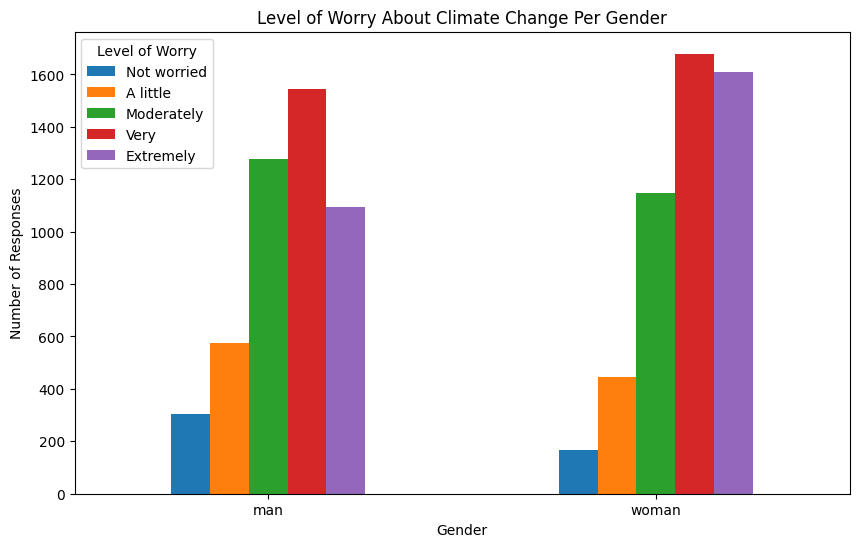

In [85]:
# The gender column seems clean with two categories: 'woman' and 'man'.
# We can now plot the level of worry per gender.

# Group the data by gender and level of worry, then count the number of responses
worry_per_gender = anxiety.groupby(['D2', 'Q1']).size().unstack()

# Plot the distribution of worry per gender using a bar chart
worry_per_gender.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.title('Level of Worry About Climate Change Per Gender')
plt.xticks(rotation=0)  # Keep the gender labels horizontal for better readability
plt.legend(title='Level of Worry', labels=['Not worried', 'A little', 'Moderately', 'Very', 'Extremely'])

# Show the plot
plt.show()


In [86]:
# anxiety.to_csv('anxiety_clean.csv', index=False)


#### Survey EDA

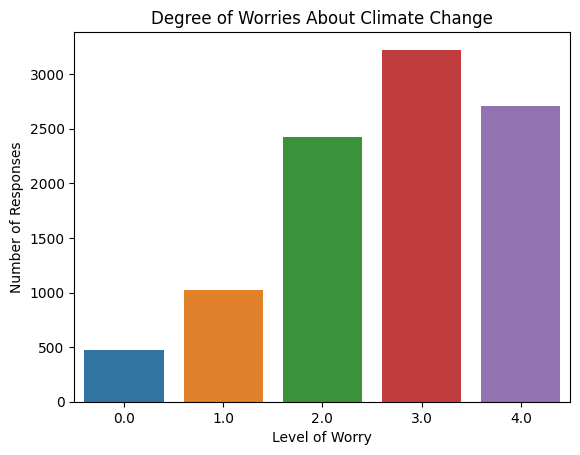

In [87]:
sns.countplot(x='Q1', data=anxiety) 
plt.title('Degree of Worries About Climate Change')
plt.xlabel('Level of Worry')
plt.ylabel('Number of Responses')
plt.show()


In [88]:
anxiety.describe()


,D1,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q7_9,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9
count,10000.000000,9852.000000,9842.000000,9823.000000,9829.000000,9846.000000,9750.000000,9815.000000,9817.000000,9822.000000,...,9329.000000,9498.000000,9610.000000,9674.000000,9665.000000,9641.000000,9623.000000,9601.000000,9492.000000,9656.000000
mean,21.228400,2.676715,0.681366,0.521327,0.633635,0.689519,0.315795,0.585023,0.515229,0.466300,...,0.630829,1.628448,1.667950,1.841741,1.338231,1.831553,1.160969,1.675346,1.629899,1.157933
std,2.551369,1.124173,0.465971,0.499570,0.481835,0.462714,0.464855,0.492743,0.499793,0.498888,...,0.482606,1.205520,1.279188,1.240896,1.147148,1.261562,1.154265,1.305639,1.243965,1.130077
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,21.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,23.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [89]:
# ! pip install praw
# ! pip install textblob

In [90]:
# import praw
# from textblob import TextBlob
# import matplotlib.pyplot as plt

# # Authenticate to Reddit
# reddit = praw.Reddit(
#     client_id='mDnQ52uK8bEWLO9kr6wnUw',
#     client_secret='wqivTcktUmwokeoRUVhwd8TYmICNeQ',
#     user_agent='reddit_sentiment_analysis',  # e.g., 'reddit_sentiment_analysis'
#     username='antique-incident-560',
#     password='Kille1995!'
# )

# # Function to fetch comments or posts
# def get_reddit_comments(subreddit, keyword, limit=1000):
#     comments = []
#     for submission in reddit.subreddit(subreddit).search(keyword, limit=limit):
#         submission.comments.replace_more(limit=None)  # fetch all comments
#         for comment in submission.comments.list():
#             comments.append(comment.body)
#     return comments

# # Fetch comments
# comments = get_reddit_comments('environment', 'climate change')


### Web scrapping

In [91]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup

# # URL of the Wikipedia page
# url = 'https://en.wikipedia.org/wiki/   '

# # Make a GET request to fetch the raw HTML content
# html_content = requests.get(url).text

# # Parse the HTML content using BeautifulSoup
# soup = BeautifulSoup(html_content, "html.parser")

# # Since a page might contain multiple tables, you may need to check which one you need by indexing
# tables = pd.read_html(str(soup))

# # Assuming the table you need is the first one (index 0)
# co2_emissions = tables[0]

# # Display the DataFrame
# print(co2_emissions)

# # Optionally, save the table to a CSV file
# #co2_emissions.to_csv('CO2_emissions_by_country.csv', index=False)


In [92]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_air_pollution'

html_content = requests.get(url).text

soup = BeautifulSoup(html_content, "html.parser")

tables = pd.read_html(str(soup))

air_pollution = tables[0]  # Adjust the index as needed based on visual inspection of `tables`

print(air_pollution)

#air_pollution.to_csv('air_pollution_by_country.csv', index=False)


     Rank                         Country  \
0       1                      Bangladesh   
1       2                           India   
2       3                           Nepal   
3       4                           Qatar   
4       5                        Pakistan   
..    ...                             ...   
212   213                    Cook Islands   
213   214                       Greenland   
214   215                Marshall Islands   
215   216  Federated States of Micronesia   
216   217                        Kiribati   

     Particulate matter (PM2.5)  (in μg/m3) WHO-Guideline=5  \
0                                                54.17        
1                                                41.39        
2                                                39.18        
3                                                39.16        
4                                                38.90        
..                                                 ...        
212               

C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\1048903709.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


### CO2 emissions cleaning

In [93]:
emissions = pd.read_csv('CO2_emissions_by_country.csv')

emissions.isna().sum()

Country/territory                      0
Fossil CO2 emissions (ktCO2/year)      0
Fossil CO2 emissions (ktCO2/year).1    0
Fossil CO2 emissions (ktCO2/year).2    0
Fossil CO2 emissions (ktCO2/year).3    0
Fossil CO2 emissions (ktCO2/year).4    0
Per capita (tCO2/year)                 2
% of world                             0
Change (1990=100%)                     0
dtype: int64

In [94]:
emissions.head()

,Country/territory,Fossil CO2 emissions (ktCO2/year),Fossil CO2 emissions (ktCO2/year).1,Fossil CO2 emissions (ktCO2/year).2,Fossil CO2 emissions (ktCO2/year).3,Fossil CO2 emissions (ktCO2/year).4,Per capita (tCO2/year),% of world,Change (1990=100%)
0,Country/territory,1970.0,1990.0,2005.0,2017.0,2022.0,2022.00,2022,2022
1,Aruba,25.2,189.3,358.2,426.8,455.1,4.25,0.001%,240.4%
2,Afghanistan,1734.1,2896.5,1333.8,8546.9,5675.8,0.14,0.015%,196.0%
3,Angola,8948.2,11288.8,15964.1,26137.4,20185.7,0.58,0.052%,178.8%
4,Anguilla,2.2,6.1,13.7,29.1,22.8,1.52,0.000%,372.5%


In [95]:
emissions.columns = [
    'countryterritory', '1970',
    '1990', '2005',
    '2017', '2022',
    'per_capita_tco2year', 'perc_of_world', 'change'
]

In [96]:
emissions = emissions.drop(emissions.index[0])
emissions.head()

,countryterritory,1970,1990,2005,2017,2022,per_capita_tco2year,perc_of_world,change
1,Aruba,25.2,189.3,358.2,426.8,455.1,4.25,0.001%,240.4%
2,Afghanistan,1734.1,2896.5,1333.8,8546.9,5675.8,0.14,0.015%,196.0%
3,Angola,8948.2,11288.8,15964.1,26137.4,20185.7,0.58,0.052%,178.8%
4,Anguilla,2.2,6.1,13.7,29.1,22.8,1.52,0.000%,372.5%
5,Albania,4848.8,6647.4,4149.4,5349.3,4486.2,1.52,0.012%,67.5%


In [97]:
# emissions.to_csv('emissions_clean.csv', index=False)


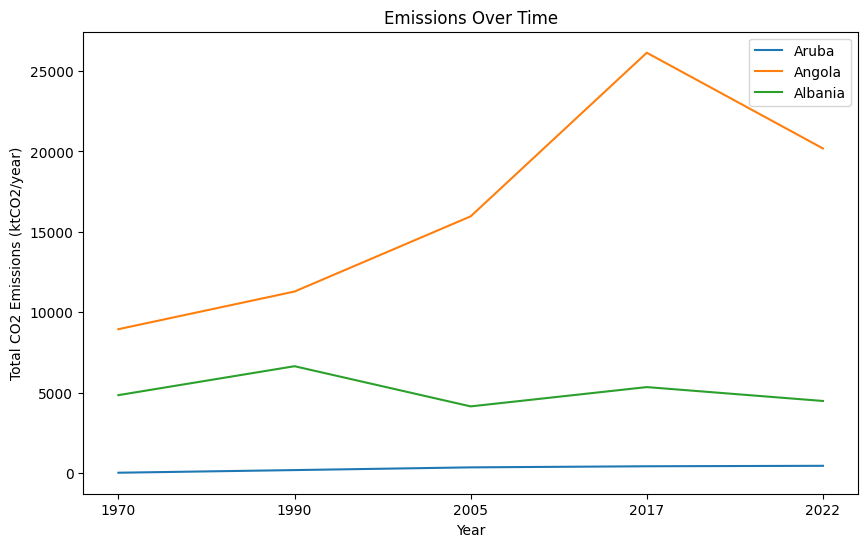

In [98]:
# Plot emissions over years for a few countries
plt.figure(figsize=(10, 6))
for country in ['Aruba', 'Angola', 'Albania']:  # Select a few countries for example
    subset = emissions[emissions['countryterritory'] == country]
    plt.plot(['1970', '1990', '2005', '2017', '2022'], subset[['1970', '1990', '2005', '2017', '2022']].iloc[0], label=country)

plt.title('Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (ktCO2/year)')
plt.legend()
plt.show()


c:\Users\kciss\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


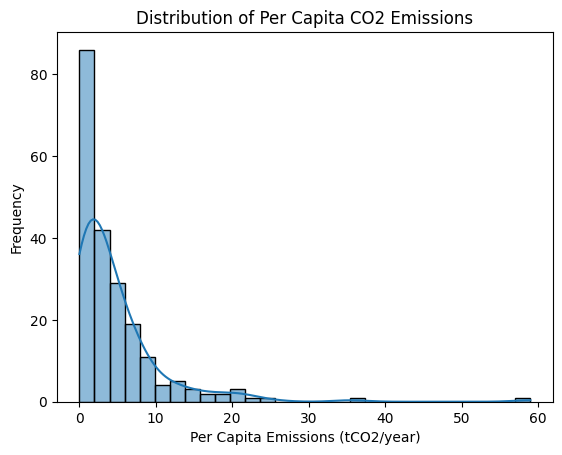

In [99]:
sns.histplot(emissions['per_capita_tco2year'], bins=30, kde=True)
plt.title('Distribution of Per Capita CO2 Emissions')
plt.xlabel('Per Capita Emissions (tCO2/year)')
plt.ylabel('Frequency')
plt.show()

In [100]:
# List of entries to exclude
exclude_countries = ['World', 'EU27', 'International Aviation', 'International Shipping']

# Filter the DataFrame
emissions = emissions[~emissions['countryterritory'].isin(exclude_countries)]

In [101]:
latest_year_column = str(max(int(col) for col in emissions.columns if col.isdigit())) 

# Sort the DataFrame based on the latest year's emissions and take the top 10
top_countries = emissions.sort_values(by=latest_year_column, ascending=False).head(10)

# Print top 10 countries for verification
print(top_countries[['countryterritory', latest_year_column]])

    countryterritory        2022
36             China  12667428.4
197    United States   4853780.2
90             India   2693034.1
160           Russia   1909039.3
99             Japan   1082645.4
89         Indonesia    692236.1
92              Iran    686415.7
50           Germany    673595.3
106      South Korea    635503.0
162     Saudi Arabia    607907.5


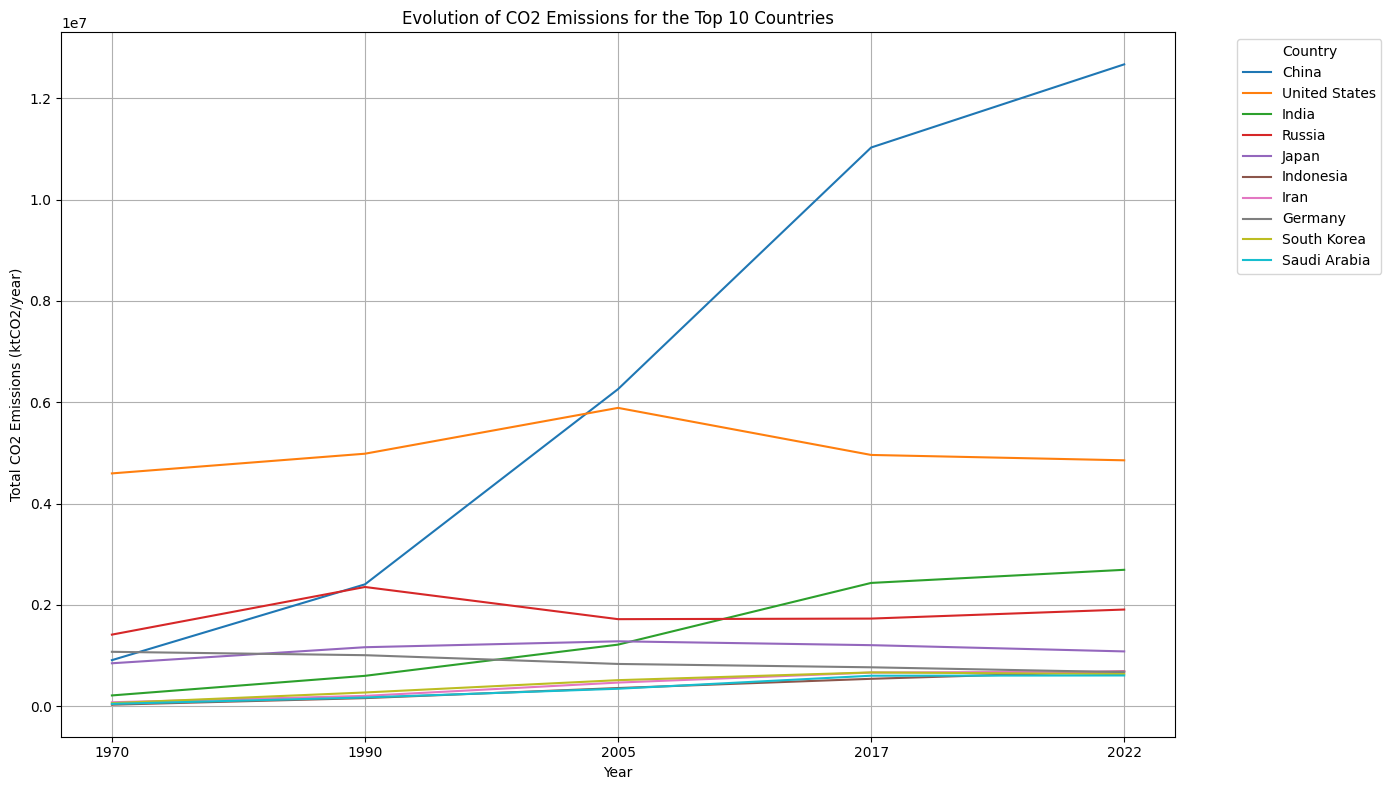

In [102]:
# List of years to plot, which are the columns representing years in your DataFrame
years = [col for col in emissions.columns if col.isdigit()]

# Plotting each country's emissions over time
plt.figure(figsize=(14, 8))
for index, row in top_countries.iterrows():
    plt.plot(years, row[years], label=row['countryterritory'])

plt.title('Evolution of CO2 Emissions for the Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (ktCO2/year)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


#### Calculate average annual emissions for each country using available years in the emissions dataset



In [103]:
emissions_years = emissions[['1970', '1990', '2005', '2017', '2022']]
emissions['average_emissions'] = emissions_years.mean(axis=1)
emissions[['countryterritory', 'average_emissions']].head()


,countryterritory,average_emissions
1,Aruba,290.92
2,Afghanistan,4037.42
3,Angola,16504.84
4,Anguilla,14.78
5,Albania,5096.22


#### Calculate annual disaster frequency per country from the disasters dataset


In [104]:
disaster_frequency = disasters.groupby(['country', 'year']).size().reset_index(name='disaster_count')
disaster_frequency.head()

,country,year,disaster_count
0,Afghanistan,1971,2
1,Afghanistan,1972,2
2,Afghanistan,1976,2
3,Afghanistan,1978,1
4,Afghanistan,1980,1


In [105]:
q_columns = [col for col in anxiety.columns if col.startswith('Q')]
anxiety['average_anxiety_score'] = anxiety[q_columns].mean(axis=1)

anxiety_summary = anxiety.groupby('country').agg({'average_anxiety_score': 'mean'}).reset_index()
anxiety_summary.head()


C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\1820574755.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anxiety_summary = anxiety.groupby('country').agg({'average_anxiety_score': 'mean'}).reset_index()


,country,average_anxiety_score
0,Australia,0.821478
1,Brazil,0.802941
2,Finland,0.702315
3,France,0.755538
4,India,0.959278


#### Calculate average depression rates by country and year from the depression dataset



In [106]:
depression_summary = depression.groupby(['entity', 'year'])['depression'].mean().reset_index()
depression_summary.rename(columns={'entity': 'country'}, inplace=True)
depression_summary.head()

,country,year,depression
0,Afghanistan,1990,4.071831
1,Afghanistan,1991,4.079531
2,Afghanistan,1992,4.088358
3,Afghanistan,1993,4.096190
4,Afghanistan,1994,4.099582


In [107]:
import pandas as pd

emissions.rename(columns={'countryterritory': 'country'}, inplace=True)
depression.rename(columns={'entity': 'country'}, inplace=True)

if 'average_emissions' not in emissions.columns:
    emissions_years = emissions[['1970', '1990', '2005', '2017', '2022']]
    emissions['average_emissions'] = emissions_years.mean(axis=1)

if 'disaster_count' not in disasters.columns:
    disaster_frequency = disasters.groupby(['country', 'year']).size().reset_index(name='disaster_count')
else:
    disaster_frequency = disasters[['country', 'year', 'disaster_count']]


emissions.head(), disaster_frequency.head(), depression.head()


(       country    1970     1990     2005     2017     2022  \
 1        Aruba    25.2    189.3    358.2    426.8    455.1   
 2  Afghanistan  1734.1   2896.5   1333.8   8546.9   5675.8   
 3       Angola  8948.2  11288.8  15964.1  26137.4  20185.7   
 4     Anguilla     2.2      6.1     13.7     29.1     22.8   
 5      Albania  4848.8   6647.4   4149.4   5349.3   4486.2   
 
    per_capita_tco2year perc_of_world  change  average_emissions  
 1                 4.25        0.001%  240.4%             290.92  
 2                 0.14        0.015%  196.0%            4037.42  
 3                 0.58        0.052%  178.8%           16504.84  
 4                 1.52        0.000%  372.5%              14.78  
 5                 1.52        0.012%   67.5%            5096.22  ,
        country  year  disaster_count
 0  Afghanistan  1971               2
 1  Afghanistan  1972               2
 2  Afghanistan  1976               2
 3  Afghanistan  1978               1
 4  Afghanistan  1980      

In [108]:
merged_data = pd.merge(depression, emissions[['country', 'average_emissions']], on='country', how='left')

merged_data = pd.merge(merged_data, disaster_frequency, on=['country', 'year'], how='left')

merged_data['disaster_count'].fillna(0, inplace=True)

correlation_matrix = merged_data[['depression', 'average_emissions', 'disaster_count']].corr()

merged_data.head()

correlation_matrix


,depression,average_emissions,disaster_count
depression,1.000000,0.099962,-0.016963
average_emissions,0.099962,1.000000,0.527467
disaster_count,-0.016963,0.527467,1.000000


In [109]:
#merged_data.to_csv('merged_data_clean.csv', index=False)


### Connecting to SQL

In [110]:
import pandas as pd
from sqlalchemy import create_engine, text
import pymysql.cursors
import os
import urllib

pw_raw = 'Kille1995' #mettez votre mot de passe 
pw = urllib.parse.quote_plus(pw_raw)
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string)

In [111]:
with engine.connect() as conn:
    conn.execute(text("CREATE DATABASE IF NOT EXISTS project2"))

emissions['change'] = emissions['change'].str.replace('%', '').str.replace(',', '').astype(float)


In [112]:
anxiety.to_sql('anxiety',engine, 'finalproject', if_exists='replace', index=False)
depression.to_sql('mental_health',engine, 'finalproject', if_exists='replace', index=False)
disasters.to_sql('disasters',engine, 'finalproject', if_exists='replace', index=False)
merged_data.to_sql('merged_data',engine, 'finalproject', if_exists='replace', index=False)
emissions.to_sql('emissions',engine, 'finalproject', if_exists='replace', index=False)



C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\15805190.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_sql except for the arguments 'name' and 'con' will be keyword-only.
  anxiety.to_sql('anxiety',engine, 'finalproject', if_exists='replace', index=False)
C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\15805190.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_sql except for the arguments 'name' and 'con' will be keyword-only.
  depression.to_sql('mental_health',engine, 'finalproject', if_exists='replace', index=False)
C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\15805190.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_sql except for the arguments 'name' and 'con' will be keyword-only.
  disasters.to_sql('disasters',engine, 'finalproject', if_exists='replace', index=False)
C:\Users\kciss\AppData\Local\Temp\ipykernel_14840\15805190.py:4: FutureWarning: Starting with pandas version 3.0 all arguments of

208

In [113]:
top_10_countries = emissions.sort_values(by='change', ascending=True).head(10)
print(top_10_countries[['country', 'change']])

                       country  change
195                    Ukraine    17.0
120                    Moldova    27.2
61                     Estonia    28.6
9                      Armenia    30.7
117                     Latvia    34.0
70                     Georgia    34.8
115                  Lithuania    38.0
153                North Korea    41.2
159                    Romania    41.5
172  Saint Pierre and Miquelon    43.3


### Reddit API

In [114]:
import pandas as pd

comments = pd.read_csv('comments_df.csv')

comments = comments[comments['0'].str.lower().str.lower() != '[removed]']

comments.head()


,0
0,Why people don’t believe climate change?
1,PEOPLE. IT. WAS. AN. AD. THATS why they took i...
3,Honestly good. Science denial is bullshit.
4,The comments in this thread are fucking trash ...
6,GOOD.


In [115]:
# import praw
# import time
# from textblob import TextBlob
# import matplotlib.pyplot as plt

# reddit = praw.Reddit(
#     client_id='mDnQ52uK8bEWLO9kr6wnUw',
#     client_secret='wqivTcktUmwokeoRUVhwd8TYmICNeQ',
#     user_agent='reddit_sentiment_analysis', 
#     username='antique-incident-560',
#     password='Kille1995!'
# )


# def get_reddit_comments(subreddit, keyword, limit_per_query=100, target_total=20000):
#     comments = []
#     total_collected = 0

#     for submission in reddit.subreddit(subreddit).search(keyword, limit=None):
#         if total_collected >= target_total:
#             break
#         submission.comments.replace_more(limit=0)  # Avoid loading deeply nested comments
#         for comment in submission.comments.list():
#             comments.append(comment.body)
#             total_collected += 1
#             if total_collected >= target_total:
#                 break
#             time.sleep(1) 

#     return comments

# comments = get_reddit_comments('environment', 'climate change')



#### Sentiment analysis

In [116]:
# ! pip install transformers
# ! pip install tensorflow
# ! pip install torch torchvision torchaudio
! pip install tf-keras


In [117]:
# import pandas as pd
from transformers import pipeline
comments.columns = ['text']  

sentiment_pipeline = pipeline("sentiment-analysis")
comments = comments[comments['text'].str.len() <= 512]

def apply_sentiment(row):
    return sentiment_pipeline(row['text'])

comments['sentiment'] = comments.apply(apply_sentiment, axis=1)

comments.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


KeyboardInterrupt: 

In [193]:
comments.head(50)


,0
0,Why people don’t believe climate change?
1,PEOPLE. IT. WAS. AN. AD. THATS why they took it down. They aren’t letting people make money off of and advertise bullshit like flat out denying environment change or saying the earth is flat.
3,Honestly good. Science denial is bullshit.
4,The comments in this thread are fucking trash wtf is wrong with you people.
6,GOOD.
7,Free speech in the USA now means people's right to distribute and propagate known false subject material. Factual things are up in the air for a large percentage of the citizens. We are a garbage society and get what we deserve
8,">Twitter said Friday April 22, 2022, it will no longer allow advertisers on its site who deny the scientific consensus on climate change, echoing a policy already in place at Google. Twitter said Friday April 22, 2022, it will no longer allow advertisers on its site who deny the scientific consensus on climate change, echoing a policy already in place at Google. BERLIN (AP) — Twitter says it will no longer allow advertisers on its site who deny the scientific consensus on climate change, echoing a policy already in place at Google."
9,[deleted]
10,[deleted]
11,"This feed only serves to remind me just how many ignorant, keyboard warriors actually exist."


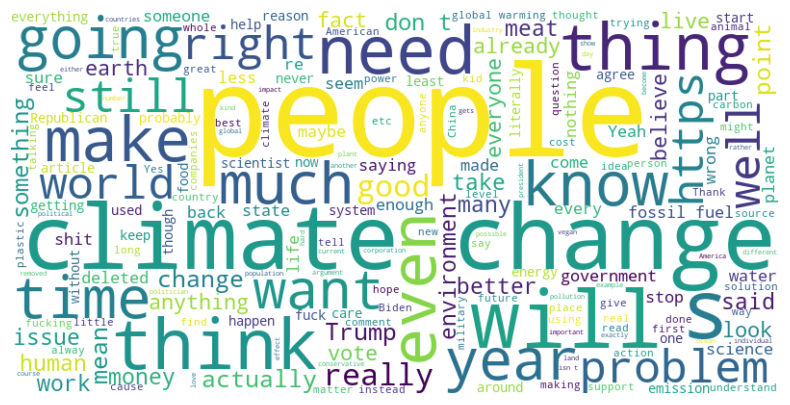

In [203]:
import pandas as pd

comments = pd.read_csv('comments_df.csv')
comments.rename(columns={'0': 'text'}, inplace=True)

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(word for review in comments.text for word in review.split() if len(word) > 3)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [222]:
import pandas as pd
from scipy import stats
emissions_median = merged_data['average_emissions'].median()

low_emissions = merged_data[merged_data['average_emissions'] <= emissions_median]
high_emissions = merged_data[merged_data['average_emissions'] > emissions_median]

normal_low = stats.shapiro(low_emissions['depression'])
normal_high = stats.shapiro(high_emissions['depression'])

if normal_low.pvalue > 0.05 and normal_high.pvalue > 0.05:
    t_stat, p_value = stats.ttest_ind(low_emissions['depression'], high_emissions['depression'], equal_var=False)
else:
    u_stat, p_value = stats.mannwhitneyu(low_emissions['depression'], high_emissions['depression'])

if p_value < 0.05:
    result = "reject the null hypothesis, suggesting a difference in depression rates."
else:
    result = "fail to reject the null hypothesis, suggesting no significant difference in depression rates."

result


'reject the null hypothesis, suggesting a difference in depression rates.'

In [1]:
from flask import Flask, jsonify, request
import pandas as pd

df = pd.read_csv("merged_data_clean.csv")

app = Flask(__name__)

def paginate(queryset, page, size):
    page = max(int(page), 1)
    size = max(int(size), 1)
    start = (page - 1) * size
    end = start + size
    return queryset[start:end]

@app.route("/mental-health-stats", methods=["GET"])
def get_mental_health_stats():
    country = request.args.get("country")
    year = request.args.get("year")
    disorder = request.args.get("disorder")
    page = request.args.get("page", 1)
    size = request.args.get("size", 10)

    # Filter the dataset
    filtered_data = df.copy()
    if country:
        filtered_data = filtered_data[filtered_data["country"] == country]
    if year:
        filtered_data = filtered_data[filtered_data["year"] == int(year)]
    if disorder and disorder in df.columns:
        filtered_data = filtered_data[["country", "year", disorder]]

    # Paginate results
    paginated_data = paginate(filtered_data.to_dict(orient="records"), page, size)
    return jsonify(paginated_data)

@app.route("/mental-health-stats/<country>/<int:year>", methods=["GET"])
def get_mental_health_stats_by_country_year(country, year):
    result = df[(df["country"] == country) & (df["year"] == year)]
    if result.empty:
        return jsonify({"error": "No data found for the given country and year."}), 404

    return jsonify(result.to_dict(orient="records"))

@app.route("/environmental-stats", methods=["GET"])
def get_environmental_stats():
    country = request.args.get("country")
    year = request.args.get("year")
    page = request.args.get("page", 1)
    size = request.args.get("size", 10)

    # Filter the dataset
    filtered_data = df[["country", "year", "average_emissions", "disaster_count"]].copy()
    if country:
        filtered_data = filtered_data[filtered_data["country"] == country]
    if year:
        filtered_data = filtered_data[filtered_data["year"] == int(year)]

    # Paginate results
    paginated_data = paginate(filtered_data.to_dict(orient="records"), page, size)
    return jsonify(paginated_data)

@app.route("/environmental-stats/<country>/<int:year>", methods=["GET"])
def get_environmental_stats_by_country_year(country, year):
    result = df[(df["country"] == country) & (df["year"] == year)][["country", "year", "average_emissions", "disaster_count"]]
    if result.empty:
        return jsonify({"error": "No data found for the given country and year."}), 404

    return jsonify(result.to_dict(orient="records"))

@app.route("/country-stats/<country>", methods=["GET"])
def get_country_stats(country):
    result = df[df["country"] == country]
    if result.empty:
        return jsonify({"error": "No data found for the given country."}), 404

    return jsonify(result.to_dict(orient="records"))

@app.route("/analytics/top-countries", methods=["GET"])
def get_top_countries():
    metric = request.args.get("metric")
    order = request.args.get("order", "desc")

    if metric not in df.columns:
        return jsonify({"error": "Invalid metric provided."}), 400

    sorted_data = df.groupby("country")[metric].mean().reset_index()
    sorted_data = sorted_data.sort_values(by=metric, ascending=(order == "asc"))

    return jsonify(sorted_data.to_dict(orient="records"))

if __name__ == "__main__":
    app.run(debug=True, use_reloader=False, port=5001)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [13/Feb/2025 17:07:40] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [13/Feb/2025 17:07:58] "GET /country-stats/Afghanistan HTTP/1.1" 200 -


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Charger les données
df = pd.read_csv("merged_data_clean.csv")  # Remplace par ton fichier réel

df.head()


,country,code,year,schizophrenia,bipolardisorder,eatingdisorders,anxietydisorders,drugusedisorders,depression,alcoholusedisorders,average_emissions,disaster_count
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,4037.42,1.0
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,4037.42,6.0
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,4037.42,3.0
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,4037.42,4.0
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,4037.42,1.0


Colonnes disponibles : Index(['country', 'code', 'year', 'schizophrenia', 'bipolardisorder',
       'eatingdisorders', 'anxietydisorders', 'drugusedisorders', 'depression',
       'alcoholusedisorders', 'average_emissions', 'disaster_count'],
      dtype='object')


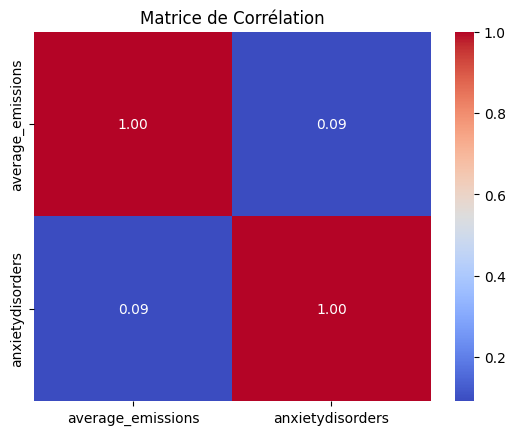

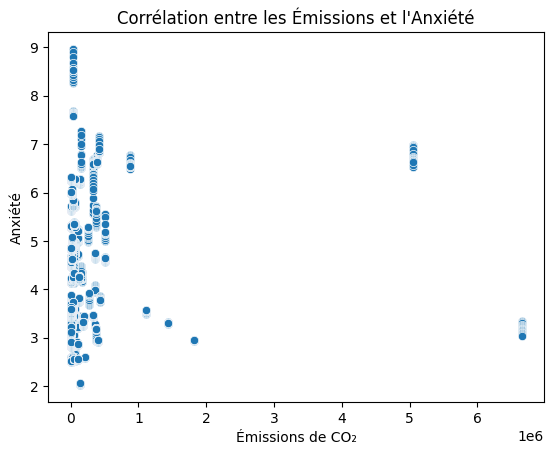

Coefficient de corrélation : 0.09
P-value : 0.0000
La corrélation est statistiquement significative.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Charger les données
df = pd.read_csv("merged_data_clean.csv")  # Remplace par ton fichier réel

# Vérifier les colonnes disponibles
print("Colonnes disponibles :", df.columns)

# Sélectionner les variables pertinentes
cols_of_interest = ["average_emissions", "anxietydisorders"]
df_selected = df[cols_of_interest].dropna()  # Supprime les valeurs manquantes

# 📊 1. Afficher la matrice de corrélation
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# 📉 2. Tracer un nuage de points
sns.scatterplot(x=df_selected["average_emissions"], y=df_selected["anxietydisorders"])
plt.xlabel("Émissions de CO₂")
plt.ylabel("Anxiété")
plt.title("Corrélation entre les Émissions et l'Anxiété")
plt.show()

# 🔢 3. Calculer le coefficient de corrélation de Pearson
corr_coef, p_value = pearsonr(df_selected["average_emissions"], df_selected["anxietydisorders"])
print(f"Coefficient de corrélation : {corr_coef:.2f}")
print(f"P-value : {p_value:.4f}")

# Interprétation du résultat
if p_value < 0.05:
    print("La corrélation est statistiquement significative.")
else:
    print("Pas de corrélation significative.")


🔹 Random Forest R² Score: 0.72
🔹 Mean Absolute Error (MAE): 0.85


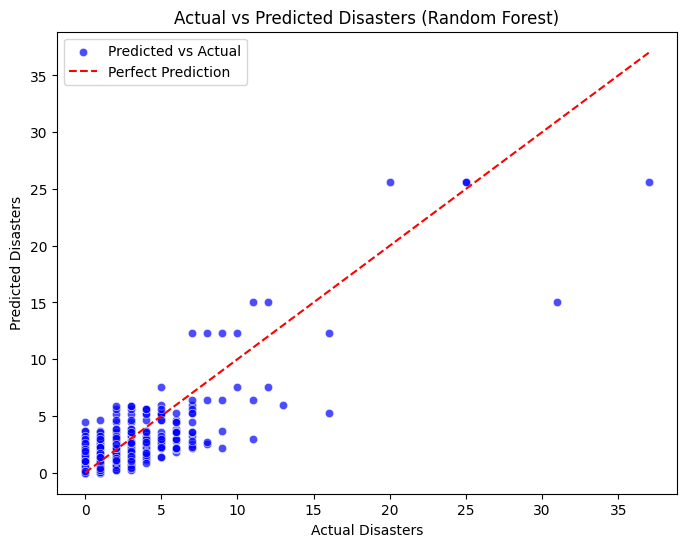

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 🔹 Load the dataset
df = pd.read_csv("merged_data_clean.csv") 

df = df[["average_emissions", "disaster_count"]].dropna()  

# 🔹 Define Features (X) and Target (y)
X = df[["average_emissions"]]  
y = df["disaster_count"]     

# 🔹 Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 Random Forest R² Score: {r2:.2f}")  # Higher is better (1.0 = perfect prediction)
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")  # Lower is better

# 🔹 Visualizing Actual vs. Predicted Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Disasters")
plt.ylabel("Predicted Disasters")
plt.title("Actual vs Predicted Disasters (Random Forest)")
plt.legend()
plt.show()
